# Gene order and gene functional category abundances


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ete3 as ete
import os
import Bio
import random
import scipy.stats as stats
from functools import *
from Bio import Entrez
from Bio import SeqIO
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_context("paper")
%matplotlib inline


#as part of quality control the following viruses had to be omitted from our analysis
#they contain misannotations or mislabeled hosts, etc. 
badFolders = ['Acyrthosiphon_pisum_secondary_endosymbiont_phage_1_uid14047', 'Aureococcus_anophagefferens_virus_MM_2014_uid258005', 'Dragonfly_associated_microphage_1_uid177547', 'Enterobacter_phage_PG7_uid240014', 'Escherichia_phage_vB_EcoM_JS09_uid248321', 'Lactobacillus_phage_LL_H_uid19803', 'Providencia_phage_Redjac_uid177540', 'Pseudoalteromonas_phage_RIO_1_uid206039', 'Sputnik_virophage_2_uid243067', 'Sputnik_virophage_3_uid243065', 'Staphylococcus_phage_6ec_uid253318', 'Streptococcus_phage_DCC1738_uid253219', 'Streptococcus_phage_IC1_uid253220', 'Streptococcus_phage_K13_uid253223', 'Streptococcus_phage_SMP_uid18529', 'Vibrio_phage_CP_T1_uid181062', 'Vibrio_phage_vpms1_uid212709', 'Vibrio_phage_VPUSM_8_uid227006',  'Abaca_bunchy_top_virus_uid28697','Shallot_yellow_stripe_virus_uid15745','Equine_rhinitis_A_virus_uid15205','African_pouched_rat_arterivirus_uid274797','Spilanthes_yellow_vein_virus_uid19779', 'Velvet_bean_severe_mosaic_virus_uid41175','Paramecium_bursaria_Chlorella_virus_FR483_uid18305','Human_endogenous_retrovirus_K113_uid222261','Acholeplasma_phage_MV_L1_uid14573']
#viruses whose lineage is improperly annotated (they don't belong to any Baltimore group)
unknowns= ['Bacillus_phage_phBC6A51_uid15021', 'Bacillus_phage_phBC6A52_uid15022', 'Badger_feces_associated_gemycircularvirus_uid281125', 'Chaetoceros_DNA_virus_7_uid237558', 'Chaetoceros_lorenzianus_DNA_Virus_uid63565', 'Chaetoceros_tenuissimus_DNA_virus_uid60753', 'Cladosporium_cladosporioides_virus_1_uid258308', 'Enterobacteria_phage_YYZ_2008_uid32231', 'European_mountain_ash_ringspot_associated_virus_uid39973', 'Faecal_associated_gemycircularvirus_3_uid268557', 'Faecal_associated_gemycircularvirus_4_uid268556', 'Faecal_associated_gemycircularvirus_5_uid268555', 'Faecal_associated_gemycircularvirus_6_uid268554', 'Faecal_associated_gemycircularvirus_7_uid268553', 'Gentian_ovary_ring_spot_virus_uid256090', 'Geobacillus_virus_E2_uid19797', 'Glossina_pallidipes_salivary_gland_hypertrophy_virus_uid28839', 'Haloarcula_hispanica_icosahedral_virus_2_uid109269', 'Haloarcula_phage_SH1_uid15535', 'Halovirus_PH1_uid196975', 'Halovirus_VNH_1_uid262927', 'Human_genital_associated_circular_DNA_virus_1_uid281399', 'Lactobacillus_johnsonii_prophage_Lj771_uid28145', 'Magnaporthe_oryzae_RNA_virus_uid272442', 'Mongoose_feces_associated_gemycircularvirus_a_uid281407', 'Mongoose_feces_associated_gemycircularvirus_b_uid281406', 'Mongoose_feces_associated_gemycircularvirus_c_uid281404', 'Mongoose_feces_associated_gemycircularvirus_d_uid281405', 'Mycoplasma_phage_phiMFV1_uid14387', 'Penicillium_roqueforti_dsRNA_mycovirus_1_uid258162', 'Phage_Gifsy_1_uid32269', 'Phage_Gifsy_2_uid32271', 'Pigeonpea_cryptic_virus_uid244664', 'Planaria_asexual_strain_specific_virus_like_element_type_1_uid14140', 'Pseudomonas_phage_phi_Pto_bp6g_uid240724', 'Rhizoctonia_fumigata_mycovirus_uid283068', 'Rhodococcus_phage_REQ2_uid81171', 'Rhodococcus_phage_REQ3_uid81175', 'Rose_rosette_virus_uid64937', 'Rosellinia_necatrix_fusarivirus_1_uid255787', 'Rosellinia_necatrix_megabirnavirus_1_W779_uid41609', 'Salisaeta_icosahedral_phage_1_uid167575', 'Salmonella_phage_Fels_1_uid29267', 'Sodalis_phage_phiSG1_uid16583', 'Staphylococcus_phage_phi2958PVL_uid32173', 'Staphylococcus_phage_tp310_1_uid20659', 'Staphylococcus_phage_tp310_3_uid20663', 'Stenotrophomonas_phage_phiSMA9_uid15493', 'Streptococcus_phage_20617_uid239271', 'Streptococcus_phage_phiBHN167_uid227353', 'Streptococcus_pyogenes_phage_315_1_uid14533', 'Streptococcus_pyogenes_phage_315_2_uid14528', 'Streptococcus_pyogenes_phage_315_3_uid14529', 'Streptococcus_pyogenes_phage_315_4_uid14530', 'Streptococcus_pyogenes_phage_315_5_uid14531', 'Streptococcus_pyogenes_phage_315_6_uid14532', 'Tanay_virus_uid246129', 'Thermococcus_prieurii_virus_1_uid84407', 'Thermus_phage_IN93_uid14235', 'Thermus_phage_P23_77_uid40235']
badFolders=badFolders+unknowns
#these are satellite viruses 
sats = ['Ageratum_conyzoides_associated_symptomless_alphasatellite_uid259293', 'Ageratum_enation_alphasatellite_uid181994', 'Ageratum_leaf_curl_betasatellite_uid195929', 'Ageratum_leaf_curl_Cameroon_betasatellite_uid36669', 'Ageratum_yellow_leaf_curl_betasatellite_uid14439', 'Ageratum_yellow_vein_China_alphasatellite_uid237561', 'Ageratum_yellow_vein_China_virus_associated_DNA_beta_uid15515', 'Ageratum_yellow_vein_Singapore_alphasatellite_uid14232', 'Ageratum_yellow_vein_virus_satellite_DNA_beta_uid14444', 'Alternanthera_yellow_vein_virus_satellite_DNA_beta_uid19833', 'Andrographis_yellow_vein_leaf_curl_betasatellite_uid243492', 'Bhendi_yellow_vein_India_betasatellite__India_Aurangabad_OY164_2006__uid61557', 'Bhendi_yellow_vein_mosaic_betasatellite__India_Coimbator_OYCO1_2005__uid61777', 'Bhendi_yellow_vein_mosaic_virus_associated_alphasatellite_uid174781', 'Bhendi_yellow_vein_mosaic_virus_satellite_DNA_beta_uid14445', 'Black_medic_leafroll_alphasatellite_1_uid243500', 'Cardamom_bushy_dwarf_virus_satellite_uid230064', 'Cassava_mosaic_Madagascar_alphasatellite_uid175666', 'Chili_leaf_curl_Bhatinda_betasatellite_uid206467', 'Chilli_leaf_curl_alphasatellite_uid253224', 'Chilli_leaf_curl_Multan_alphasatellite_uid39933', 'Chilli_leaf_curl_virus_satellite_DNA_beta_uid14441', 'Cleome_leaf_crumple_virus_associated_DNA_1_uid60045', 'Corchorus_yellow_vein_mosaic_betasatellite_uid192608', 'Cotton_leaf_curl_Burewala_alphasatellite_uid45935', 'Cotton_leaf_curl_Burewala_betasatellite_uid45933', 'Cotton_leaf_curl_Gezira_alphasatellite_uid42507', 'Cotton_leaf_curl_Gezira_virus_satellite_DNA_beta_uid15166', 'Cotton_leaf_curl_Multan_betasatellite_uid15780', 'Cotton_leaf_curl_virus_associated_DNA_1_isolate_Lucknow_uid65305', 'Cotton_leaf_curl_virus_associated_DNA_beta_uid14438', 'Cotton_leaf_curl_virus_betasatellite_uid162497', 'Cowpea_severe_leaf_curl_associated_DNA_beta_uid15157', 'Croton_yellow_vein_mosaic_alphasatellite_uid45931', 'Croton_yellow_vein_mosaic_betasatellite_uid18249', 'Cuban_alphasatellite_1_uid210798', 'Dragonfly_associated_alphasatellite_uid181244', 'Emilia_yellow_vein_virus_associated_DNA_beta_uid37893', 'Erectites_yellow_mosaic_virus_satellite_DNA_beta_uid19827', 'Eupatorium_yellow_vein_virus_satellite_DNA_beta_uid14447', 'Faba_bean_necrotic_stunt_alphasatellite_1_uid243499', 'Faba_bean_necrotic_stunt_alphasatellite_2_uid243498', 'French_bean_leaf_curl_betasatellite_Kanpur_uid169556', 'Gossypium_darwinii_symptomless_alphasatellite_uid39593', 'Gossypium_davidsonii_symptomless_alphasatellite_uid39589', 'Gossypium_mustilinum_symptomless_alphasatellite_uid39591', 'Grapevine_satellite_virus_uid208539', 'Guar_leaf_curl_alphasatellite_uid193981', 'Hedyotis_uncinella_yellow_mosaic_betasatellite_uid230991', 'Honeysuckle_yellow_vein_mosaic_disease_associated_satellite_DNA_beta_uid19863', 'Honeysuckle_yellow_vein_mosaic_virus_satellite_DNA_beta_uid14620', 'Leucas_zeylanica_yellow_vein_virus_satellite_DNA_beta_uid41305', 'Ludwigia_leaf_distortion_betasatellite__India_Amadalavalasa_Hibiscus_2007__uid29233', 'Ludwigia_yellow_vein_virus_associated_DNA_beta_uid15561', 'Luffa_puckering_and_leaf_distortion_associated_betasatellite__India_Gurdaspur_Okra_2013__uid253218', 'Luffa_puckering_and_leaf_distortion_associated_DNA_beta_uid15779', 'Malachra_yellow_vein_mosaic_virus_associated_satellite_DNA_beta_uid28727', 'Malvastrum_leaf_curl_betasatellite_uid16301', 'Malvastrum_leaf_curl_Guangdong_betasatellite_uid243827', 'Malvastrum_yellow_vein_Yunnan_virus_satellite_DNA_beta_uid14567', 'Melon_chlorotic_mosaic_virus_associated_alphasatellite_uid51413', 'Mesta_yellow_vein_mosaic_virus_alphasatellite__India_Hoshiarpur_Okra_2013__uid253217', 'Mesta_yellow_vein_mosaic_virus_associated_alphasatellite_uid174780', 'Mesta_yellow_vein_mosaic_virus_associated_DNA_beta_uid21015', 'Milk_vetch_dwarf_C10_alphasatellite_uid240682', 'Mirabilis_leaf_curl_India_virus_associated_betasatellite_uid255800', 'Mungbean_yellow_mosaic_India_virus_associated_betasatellite__India__Faizabad__Cow_Pea_2012__uid177773', 'Nanovirus_like_particle_uid14386', 'Okra_enation_leaf_curl_betasatellite__India_Sonipat_EL10_2006__uid61781', 'Okra_leaf_curl_Mali_virus_satellite_DNA_beta_uid20323', 'Okra_yellow_vein_disease_associated_sequence_uid14443', 'Olive_viral_satellite_RNA_uid230268', 'Papaya_leaf_curl_alphasatellite_uid233414', 'Papaya_leaf_curl_China_virus_satellite_DNA_beta_uid19819', 'Pepper_leaf_curl_virus_satellite_DNA_beta_uid28283', 'Pepper_leaf_curl_Yunnan_virus_satellite_DNA_beta_uid29415', 'Potato_apical_leaf_curl_disease_associated_satellite_DNA_beta_uid18323', 'Radish_leaf_curl_virus_betasatellite_uid28281', 'Sida_leaf_curl_virus_satellite_DNA_beta_uid19823', 'Sida_yellow_mosaic_virus_China_associated_DNA_beta_uid15514', 'Sida_yellow_vein_China_alphasatellite_uid238950', 'Siegesbeckia_yellow_vein_virus_associated_DNA_beta_uid17269', 'Subterranean_clover_stunt_C6_alphasatellite_uid14180', 'Synedrella_leaf_curl_alphasatellite_uid263034', 'Tobacco_leaf_chlorosis_betasatellite_uid178075', 'Tobacco_leaf_curl_disease_associated_sequence_uid14442', 'Tobacco_leaf_curl_PUSA_alphasatellite_uid56023', 'Tobacco_leaf_curl_virus_associated_DNA_beta_uid45925', 'Tomato_leaf_curl_Bangladesh_betasatellite_uid56017', 'Tomato_leaf_curl_Gandhinagar_betasatellite_uid231683', 'Tomato_leaf_curl_Hajipur_betasatellite_uid175587', 'Tomato_leaf_curl_Joydebpur_virus_satellite_DNA_beta_uid28273', 'Tomato_leaf_curl_Karnataka_alphasatellite_uid181995', 'Tomato_leaf_curl_Pakistan_virus_associated_DNA_1_uid38463', 'Tomato_leaf_curl_Patna_betasatellite_uid36541', 'Tomato_leaf_curl_Togo_betasatellite_Togo_2006__uid60629', 'Tomato_leaf_curl_Yemen_betasatellite_uid177643', 'Tomato_yellow_leaf_curl_China_betasatellite_uid181248', 'Tomato_yellow_leaf_curl_Vietnam_virus_satellite_DNA_beta_uid19829', 'TYLCCNV_Y322__satellite_DNA_beta_uid16338', 'Vernonia_yellow_vein_betasatellite_uid41303', 'Vernonia_yellow_vein_Fujian_virus_alphasatellite_uid72145', 'Vernonia_yellow_vein_Fujian_virus_betasatellite_uid72143', 'Zinnia_leaf_curl_disease_associated_sequence_uid14440', 'Zinnia_leaf_curl_virus_associated_DNA_beta_uid14538']


def getTaxidFromGenomeFolder(genome_folder):
    #Takes an rpt file for a genome and returns the taxid in it.
    if folder not in badFolders and folder not in sats:
        with open(os.path.join('all_rpt', folder, os.listdir(os.path.join('all_rpt', folder))[0])) as rpt_file:
            for line in rpt_file:
                if line.startswith('Taxid: '):
                    return int(line[7:-1])
                

def getHostTaxidFromGenomeFolder(genome_folder):
    #Takes a folder containing an asn file and returns the taxid of the host of the virus described by that asn file. 
    if folder not in badFolders and folder not in sats:
        with open('folderToHostTaxid.txt', 'r') as taxid2host:
            for line in taxid2host:
                if genome_folder in line:
                    return int(line.split('\t')[1][:-1])
        return 0
    

def getGenomeLengthFromGenomeFolder(genome_folder):
    total = 0
    if folder not in badFolders and folder not in sats:
        for file in os.listdir(os.path.join('all_ptt', folder)):
            with open(os.path.join('all_ptt', folder, file)) as ptt_file:
                line = ptt_file.readline()
                index = line.find('- 1..')
                if index == -1:
                    return -1
                num = line[index + 5 : -1]
                total += int(num)
        return total
    

def getCodingNumberAndOverlapNumberFromGenomeFolder(folder):
    totalCoding = 0
    totalOverlap = 0
    for file in os.listdir(os.path.join('all_ptt', folder)):
        #these folders contain genomes with misannotation of gene overlap,non-coding DNA, or host information from NCBI. 
        if folder not in badFolders and folder not in sats:
            with open(os.path.join('all_ptt', folder, file)) as ptt_file:
                line = ptt_file.readline()
                index = line.find('- 1..')
                repliconLength = int(line[index + 5 : -1])
                indicesThatOverlap = [0] * repliconLength
                line = ptt_file.readline()
                line = ptt_file.readline()

                uniqueIndices = set([])
                for line in ptt_file:                                     
                    #this part is to collect beginning and end indices for genes
                    line = line.split('\t')[0]
                    [start, end] = [int(x) for x in line.split('..')]
                    #this is put in place to distinguish linear from circular genomes. Here, we're looking for linear genomes
                    if start < end:                    
                        for i in range(start, end):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                    #here were are looking for circular genomes to be able to properly count noncoding bases
                    elif start > end:
                        for i in range(start, repliconLength):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                        for i in range(1, end):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)          
                
                totalCoding += len(uniqueIndices)
                #totalOverlap += len(bigList) - len(uniqueIndices)
                totalOverlap += sum(indicesThatOverlap)
    return (totalCoding, totalOverlap)


def getProtienNamesFromGenomeFolder(folder):
    protVec=[]
    for file in os.listdir(os.path.join('all_ptt', folder)):
        #these folders contain genomes with misannotation of gene overlap, non-coding DNA, or host information from NCBI. 
        if folder not in badFolders and folder not in sats:
            with open(os.path.join('all_ptt', folder, file)) as ptt_file:
                line = ptt_file.readline()
                line = ptt_file.readline()
                line = ptt_file.readline()               
                for line in ptt_file:                    
                    #this is to collect the name of proteins from ptt files                   
                    protVec.append(line.split('\t')[-1].rstrip())                                    
    return (protVec)


genomeLengths = []
lengthData = []
counter = 0
length_lists = []
hostTaxidList = []
taxidList = []
folders = []
proteinNames=[]
dbObject = ete.NCBITaxa()

for folder in os.listdir('all_faa'):
    #these entries had problems with their gene overlap, protein, and noncoding annotation so they're excluded
    if folder not in badFolders and folder not in sats:
        length_lists.append([])
        for fileName in os.listdir(os.path.join('all_faa', folder)):
            with open(os.path.join('all_faa', folder, fileName), "r") as faa_file:
                proteins = SeqIO.parse(faa_file, 'fasta')
                for protein in proteins:
                    length_lists[counter].append(float(len(protein.seq)))

        hostTaxid = getHostTaxidFromGenomeFolder(folder)
        # These taxids come viruses with unidentified hosts 
        if hostTaxid and hostTaxid != 11086 and hostTaxid != 10036 and hostTaxid != 37965 and hostTaxid != 10640  and hostTaxid != 32644 and hostTaxid != 1 and hostTaxid != 212035 and hostTaxid != 1051671:
            taxidList.append(getTaxidFromGenomeFolder(folder))
            hostTaxidList.append(hostTaxid)
            genomeLengths.append(getGenomeLengthFromGenomeFolder(folder))
            folders.append(folder)
            proteinNames.append(getProtienNamesFromGenomeFolder(folder))
            counter += 1
        else:
            length_lists = length_lists[:-1]
        
        #Uncomment the following lines to see the code's progress while its running
        """
        if counter % 100 == 0:
            print(str(int(np.round(float(counter) * 100.0 / 2701.0))) + '% done.')
        """

taxidLineages = [dbObject.get_lineage(t) for t in taxidList]
englishLineages = [[str(rank) for rank in dbObject.translate_to_names(lin)]
                   for lin in taxidLineages]
hostTaxidLineages = [dbObject.get_lineage(t) for t in hostTaxidList]
hostEnglishLineages = [[str(rank) for rank in dbObject.translate_to_names(lin)] 
                       for lin in hostTaxidLineages]

for i in range(len(length_lists)):
    lengthData.append({'length_list' : length_lists[i],
                       'taxid' : taxidList[i],
                       'hostTaxid' : hostTaxidList[i],
                       'englishLineage' : englishLineages[i],
                       'taxidLineage' : taxidLineages[i],
                       'hostEnglishLineage' : hostEnglishLineages[i],
                       'hostTaxidLineage' : hostTaxidLineages[i],
                       'mean' : np.mean(length_lists[i]),
                       'std' : np.std(length_lists[i]),
                       'median' : np.median(length_lists[i]),
                       'numProteins' : len(length_lists[i]),
                       'genomeLength' : genomeLengths[i],
                       'proteinNames': proteinNames[i],
                       'folder' : folders[i]})
                       
lengthData = [virus for virus in lengthData if virus['genomeLength'] != -1 and virus['median'] != -1]

for (i, virus) in enumerate(lengthData):
    #print(str(i) + '/' + str(len(lengthData)))
    (totalCoding, totalOverlap) = getCodingNumberAndOverlapNumberFromGenomeFolder(virus['folder'])
    virus['percentNonCoding'] = 100 * (virus['genomeLength'] - totalCoding) / virus['genomeLength']
    virus['percentOverlap'] = 100 * totalOverlap / virus['genomeLength']

/Users/Gita/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


###Examining protein coding gene annotations that are shared between different viral groups to identify problematic search terms

In [8]:
#the shared protein coding genes between dsDNA, ssDNA viruses
protMatds= [v['proteinNames'] for v in lengthData if 'dsDNA viruses, no RNA stage' in v['englishLineage']]
protMatss= [v['proteinNames'] for v in lengthData if 'ssDNA viruses' in v['englishLineage']]

ds = [i for vec in protMatds for i in vec]
ss = [i for vec in protMatss for i in vec]

len(set(ds) & set(ss))
set(ds) & set(ss)


{'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'Coat protein',
 'DNA maturation protein',
 'DNA packaging protein',
 'ORF1',
 'ORF10',
 'ORF11',
 'ORF12',
 'ORF13',
 'ORF14',
 'ORF15',
 'ORF2',
 'ORF3',
 'ORF4',
 'ORF5',
 'ORF6',
 'ORF7',
 'ORF8',
 'ORF9',
 'Orf1',
 'Orf2',
 'Orf3',
 'REP',
 'Rep',
 'Rep protein',
 'RepA',
 'VP1',
 'VP1 protein',
 'VP2',
 'VP2 protein',
 'VP3',
 'VP4',
 'VP4 precursor',
 'assembly protein',
 'capsid',
 'capsid protein',
 'capsid protein VP2',
 'cell lysis protein',
 'coat protein',
 'gpA',
 'gpC',
 'hypothetical protein',
 'major capsid protein',
 'major coat protein',
 'major structural protein',
 'mannosyl-glycoprotein endo-beta-N-acetylglucosaminidase',
 'minor capsid protein',
 'minor structural protein',
 'nonstructural protein',
 'peptidase',
 'phage replication protein',
 'putative DNA binding protein',
 'putative Rep protein',
 'putative adsorption protein',
 'putative capsid protein',
 'putative coat protein',
 'putative integrase',
 'putative major caps

###Extracting gene order sequences

In [9]:
from collections import Counter

protMat= [v['proteinNames'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage'] 
          and 'dsDNA viruses, no RNA stage' in v['englishLineage']]
genomeLen= [v['genomeLength'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage']  
            and 'dsDNA viruses, no RNA stage' in v['englishLineage']]
virusName = [v['folder'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage']  
             and 'dsDNA viruses, no RNA stage' in v['englishLineage']]
virusLineage = [v['englishLineage'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage'] 
                and 'dsDNA viruses, no RNA stage' in v['englishLineage']]
hostLineage = [v['hostEnglishLineage'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage']  
               and 'dsDNA viruses, no RNA stage' in v['englishLineage']]

#ordering the name list and the protMat to be sorted based on the genome lengths. 
protMat = [protMat for (genomeLen, protMat) in sorted (zip(genomeLen, protMat),
                                                       key=lambda pair:pair[0])]
virusName = [virusName for (genomeLen, virusName) in sorted (zip(genomeLen, virusName),
                                                             key=lambda pair:pair[0])]
virusLineage = [virusLineage for (genomeLen, virusLineage) in sorted (zip(genomeLen, virusLineage), 
                                                                      key=lambda pair:pair[0])]
hostLineage = [hostLineage for (genomeLen, hostLineage) in sorted (zip(genomeLen, hostLineage), 
                                                                   key=lambda pair:pair[0])]

#here are some search terms that can be categorized into the functional groups
capsid = ['coat', 'capsid', 'head']
matrix = ['matrix', 'tegument']
#env = ['envelope'] 
portal = ['portal','neck', 'head-tail connector', 'head-tail joining'] 
tail= [ 'tail','baseplate', 'tape measure']
packing = ['terminase', 'TerL','TerS', 'scaffold protein', 'prohead protease', 'DNA packaging']
lysis = ['holin', 'endolysin', 'lysozyme','lysis', 'lysin', 'N-acetylmuramoyl-L-alanine amidase', 
         'cell wall hydrolase']
nuclease = ['nuclease']
integrase =['integrase']
polymerase =['polymerase']
helicase =['helicase']
replication =['Rep protein','rep protein','replicase', 'replication']
regulationModification = ['transcriptional enhancer', 'transcriptional regulator', 'expression regulator',
                          'promoter', 'antirepressor','anti-repressor', 'thioredoxin','DNA methylase',
                          'methyltransferase','ADP-ribosylase','ADP-ribosyltransferase']
metabolismSynth = ['thymidine kinase', 'deaminase', 'thymidylate synthase','dihydrofolate reductase', 
                   'ribonucleotide reductase', 'dNMP kinase','dCMP hydroxymethylase',
                   'deoxynucleoside monophosphate kinase','amidase','phosphate starvation-inducible protein' ]
entryInjection = ['movement protein','injection']
trna = ['tRNA']

#determing and storing the color-code information for each viral gene (looking at only structural genes here)
colormat=[]
virusNameFiltered =[]
for vec in protMat:
    colorvec=[]
    for i in vec:          
        if any(substring in i for substring in capsid):
            colorvec.append('I')
        elif any(substring in i for substring in portal):
            colorvec.append('C')         
        elif any(substring in i for substring in tail):
            colorvec.append('E')          
        elif any(substring in i for substring in packing):
            colorvec.append('Q')         
        else:       
            colorvec.append('A')
    #colormat.append(colorvec)
    #Here we have some additional filters on gene order sequence to make sure it's not all unlabled
    #genes or not too short
    if colorvec.count('A')/len(colorvec) < 0.85 and len(colorvec)>39:                
        colormat.append(colorvec)
        #getting the index of the vectors in protMat that passed through the filter. 
        #Then I use the index to get the virus names from the virusName matrix 
        index = protMat.index(vec)
        virusNameFiltered.append(virusName[index])
        
        print('>gi|',virusName[index])
        print(str(colorvec).replace(",","").replace("'","").replace(" ", "").strip('[]'))
        
        
        #note T4likevirus_uid266638 virus genome has been copied twice, which is why we have 
        #taken this virus out in our plots.
        #originally we thought it's a genome with its gene order pattern repeated twice, until we looked 
        #further at the paper wherein the phage was first sequenced. 

>gi| Leuconostoc_phage_Lmd1_uid171974
AAAAAAAAAQQCIIAEAAEEAEAAAAAAAAAAAAAAAAAA
>gi| Leuconostoc_phage_phiLNTR3_uid253389
AAAAAAAAAAQQCIIAEAAEEAAAAAAAAAAAAAAAAAAAA
>gi| Leuconostoc_phage_phiLNTR3_uid253389
AAAAAAAAAAQQCIIAEAAEEAAAAAAAAAAAAAAAAAAAA
>gi| Leuconostoc_phage_phiLN12_uid253392
AAAAAAAAQQCIIAEAAEEAAEAAAAAAAAAAAAAAAAAAA
>gi| Leuconostoc_phage_phiLNTR2_uid253393
AAAAAAAAAAQQCIIAEAAEEAAAAAAAAAAAAAAAAAAAAA
>gi| Leuconostoc_phage_phiLN25_uid253397
AAAAAAAAAAQAQCIIAEAAEEAAAAAAAAAAAAAAAAAAA
>gi| Propionibacterium_phage_PHL111M01_uid219111
AQCAQIAAAAEAAEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
>gi| Propionibacterium_phage_PHL113M01_uid219107
AQCAQIAAAAEAAEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
>gi| Propionibacterium_phage_P105_uid177533
QQCAIIAAAAEEEEEEEEEAAAAAAAAAAAAAAAAAAAAAAAAAA
>gi| Propionibacterium_phage_P9_1_uid177529
QQCAIIAAAAEEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
>gi| Propionibacterium_phage_PHL112N00_uid219110
AQCAQIAAAAEAAEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
>gi| Propionibacterium_phage_P1_1_uid

###Plotting relative abundances of gene functional categories for different viral groups

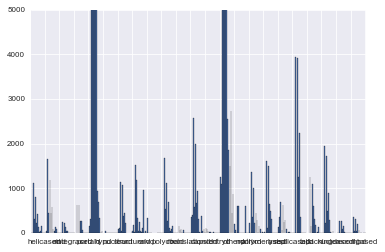

(['helicased',
  'rmd',
  'integrased',
  'portald',
  'hypd',
  'nucleard',
  'structurald',
  'envd',
  'polyd',
  'metd',
  'translationd',
  'capsidd',
  'entryd',
  'otherd',
  'matrixd',
  'polymerased',
  'lysisd',
  'replicased',
  'taild',
  'packingd',
  'nucleased',
  'recombd',
  'ligased'],
 [[7,
   0,
   0,
   0,
   163,
   0,
   81,
   170,
   343,
   2,
   0,
   360,
   118,
   1244,
   61,
   225,
   8,
   127,
   0,
   0,
   0,
   0,
   0],
  [0,
   48,
   2,
   0,
   302,
   50,
   110,
   17,
   0,
   0,
   0,
   408,
   80,
   1105,
   0,
   0,
   7,
   353,
   0,
   7,
   0,
   0,
   0],
  [1120,
   1659,
   245,
   617,
   64428,
   0,
   1137,
   1522,
   1,
   1668,
   143,
   2581,
   35,
   28851,
   607,
   1365,
   1604,
   693,
   3939,
   1262,
   1947,
   262,
   352],
  [310,
   441,
   4,
   1,
   11139,
   0,
   42,
   1178,
   0,
   541,
   53,
   581,
   11,
   9847,
   606,
   363,
   106,
   74,
   4,
   152,
   218,
   5,
   38],
  [794,
   1191,

In [13]:
# creating two functions for plotting the functional gene categories of each viral group
def proteinBar (protMat):
    protDict={} 
    capsid = ['coat', 'capsid', 'head', 'CP', 'Cap protein', 'cap protein']
    matrix = ['matrix', 'tegument']
    env =['envelope protein', 'envelope glycoprotein', 'membrane protein', 'membrane glycoprotein',
          'glycoprotein', 'spike protein']
    portal = ['portal','neck', 'head-tail connector', 'head-tail joining'] 
    tail= [ 'tail','baseplate', 'tape measure']
    packing = ['terminase', 'TerL','TerS', 'scaffold protein', 'prohead protease', 'DNA packaging']
    lysis = ['holin', 'endolysin', 'lysozyme','lysis', 'lysin', 'N-acetylmuramoyl-L-alanine amidase',
             'cell wall hydrolase','hydrolase']
    nuclease = ['nuclease', 'DNAse', 'DNase','RNAse', 'RNase']
    integrase =['integrase']
    polymerase =['polymerase']
    helicase =['helicase']
    replicase =['topisomerase', 'primase','Rep protein','rep protein','replicase', 'replication', 
                'holliday junction resolvase','clamp loader', 'sliding clamp']
    regulationModification = ['transcriptional enhancer', 'transcriptional repressor',
                              'transcriptional activation protein', 'transcription regulator', 'transcription factor',
                              'transcriptional regulator','transcriptional activator','expression regulator','promoter',
                              'antirepressor','anti-repressor', 'thioredoxin','DNA methylase','methyltransferase',
                              'ADP-ribosylase','ADP-ribosyltransferase', 'sigma factor', 'phosphatase', 
                              'apoptosis regulator','growth factor', 'ubiquitin']
    metabolismSynth = ['deaminase', 'thymidylate synthase','dihydrofolate reductase', 'ribonucleotide reductase',
                       'ribonucleotide-reductase', 'ribonucleoside-diphosphate reductase','anaerobic NTP reductase',
                       'oxidoreductase', 'kinase','dUTPase', 'ATPase','dCMP hydroxymethylase','amidase',
                       'phosphate starvation-inducible protein', 'deoxyuridine triphosphatase', 'dCTP pyrophosphatase',
                       'uracil DNA glycosylase' ]
    entryInjection = ['movement protein','injection', 'fusion protein']
    hyp=['hypothetical protein', 'putative uncharacterised protein']
    ligase =['ligase']
    structural=['structural protein']
    recomb = ['recombination','recombinase']
    translation = ['translation initiation', 'translation elongation', 'tRNA', 'translation factor']
    nuclear=['nuclear shuttle protein', 'nuclear transporter']
    poly=['polyprotein', 'readthrough protein', 'read-through protein']

    #initiating several lists that will hold genes labels with 
    capsidVec=[]
    matrixVec=[]
    envVec=[]
    portalVec=[]        
    tailVec=[]
    polymeraseVec=[]
    helicaseVec=[]
    replicaseVec=[]
    integraseVec=[]       
    nucleaseVec=[]           
    packingVec=[]
    lysisVec=[]    
    rmVec=[]
    translationVec=[]        
    metVec=[]      
    entryVec=[]  
    hypVec=[]
    otherVec=[]
    ligaseVec =[]
    structuralVec=[]
    recombVec=[]
    nuclearVec=[]
    polyVec=[]
    #Checking to see which functional category each gene belongs to
    for vec in protMat:
        for i in vec:          
            if any(substring in i for substring in capsid):
                capsidVec.append(i)
            elif any(substring in i for substring in matrix):
                matrixVec.append(i)
            elif any(substring in i for substring in env):
                envVec.append(i)  
            elif any(substring in i for substring in portal):
                portalVec.append(i)        
            elif any(substring in i for substring in tail):
                tailVec.append(i)
            elif any(substring in i for substring in polymerase):
                polymeraseVec.append(i)
            elif any(substring in i for substring in helicase):
                helicaseVec.append(i)
            elif any(substring in i for substring in replicase):
                replicaseVec.append(i)
            elif any(substring in i for substring in integrase):
                integraseVec.append(i)       
            elif any(substring in i for substring in nuclease):
                nucleaseVec.append(i)           
            elif any(substring in i for substring in packing):
                packingVec.append(i)
            elif any(substring in i for substring in lysis):
                lysisVec.append(i)    
            elif any(substring in i for substring in regulationModification):
                rmVec.append(i)
            elif any(substring in i for substring in translation):
                translationVec.append(i)        
            elif any(substring in i for substring in metabolismSynth):
                metVec.append(i)      
            elif any(substring in i for substring in entryInjection):
                entryVec.append(i)            
            elif any(substring in i for substring in ligase):
                ligaseVec.append(i)
            elif any(substring in i for substring in structural):
                structuralVec.append(i)
            elif any(substring in i for substring in recomb):
                recombVec.append(i)
            elif any(substring in i for substring in nuclear):
                nuclearVec.append(i)
            elif any(substring in i for substring in poly):
                polyVec.append(i)
            elif any(substring in i for substring in hyp):
                hypVec.append(i)
            else:       
                otherVec.append(i)
    protDict={'capsidd':capsidVec, 'matrixd': matrixVec, 'envd': envVec, 'portald': portalVec, 
              'taild': tailVec, 'structurald': structuralVec,'polymerased':polymeraseVec, 
              'replicased':replicaseVec, 'rmd':rmVec,'translationd':translationVec, 'helicased':helicaseVec,
              'integrased': integraseVec,'ligased':ligaseVec,'nucleased': nucleaseVec, 'recombd': recombVec,
              'metd':metVec,'entryd': entryVec,'nucleard': nuclearVec,'packingd': packingVec, 'lysisd':lysisVec,
              'polyd': polyVec,'hypd': hypVec, 'otherd': otherVec}

    return(protDict)

#putting all dictionaries in a list
protDictList=[]

#indices of proteDictList = 0 RNA, 1 ssDNA, 2 dsDNA, 3 euk dsDNA, 4 bact dsDNA, 5 bact sipho, 6 bact myo,
#7 bact podo, and then a bunch of eukaryotic dsDNA viruses
#going through different viral categories
protMat= [v['proteinNames'] for v in lengthData if 'dsRNA viruses' in  v['englishLineage'] 
          or 'ssRNA positive-strand viruses, no DNA stage' in v['englishLineage']
         or 'ssRNA negative-strand viruses' in v['englishLineage'] or 'Metaviridae' in v['englishLineage'] 
          or 'Retroviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'ssDNA viruses' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'dsDNA viruses, no RNA stage' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Eukaryota' in v['hostEnglishLineage'] 
          and 'dsDNA viruses, no RNA stage' in v['englishLineage']] 
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage'] 
          and 'dsDNA viruses, no RNA stage' in v['englishLineage']] 
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage'] 
          and 'Siphoviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage'] 
          and 'Myoviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Bacteria' in v['hostEnglishLineage'] 
          and 'Podoviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Eukaryota' in v['hostEnglishLineage'] 
          and 'Baculoviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Eukaryota' in v['hostEnglishLineage'] 
          and 'Poxviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Eukaryota' in v['hostEnglishLineage'] 
          and 'Herpesvirales' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Eukaryota' in v['hostEnglishLineage'] 
          and 'Papillomaviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Eukaryota' in v['hostEnglishLineage'] 
          and 'Adenoviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

protMat= [v['proteinNames'] for v in lengthData if 'Eukaryota' in v['hostEnglishLineage'] 
          and 'Polyomaviridae' in v['englishLineage']]
protDictList.append(proteinBar(protMat))

#this function was used for plotting abundances of each gene functional cateogry, but actually ended up using excel to 
#create bar plots. Both methods deal with the same data, just asthetically different.
def getXYs(ind):     
    #ind is a vector containing the list of indices (viral groups) we're interested in plotting together
    #labels is a vector of strings that describe the viral groups being plotted
    bar_width = 0.17
    #m is the number of groups we're plotting 
    m = len(ind)
    #the multiplier for bar_width so the bars can be placed next to each other
    n= 0
    #starting and updating the index of labels that we need to pull out. 
    #Corresponds to the labe of the viral group we're plotting
    n2 =-1
    #yvec will contain the number of proteins associated with each protein category, and all viral groups 
    yvec =[]
    
    for i in ind:
    #i corresponds to the indices of the protein groups we want to plot from protDictList
        n=n+1
        n2 =n2 +1
        #initializing the x and y coordinates for each bar plot
        y=[]
        x=[]
    
        for key in protDictList[i]: 
            #going through different protein categories (keys) to build the x vector labels
            #the x values are just the number of categories, multiplied by n (which keeps getting updated)
            #so the bar plots don't overlap
            x.append(key)
            #counting the number of items associated with each protein category (or key) to build the y vector
            y.append(len(protDictList[i].get(key)))    
        
        xvec = list(range(len(y)))
        xvalnew = [n + xval * m for xval in xvec] 
        yvec.append(y)
        plt.bar(xvalnew, y, align='center')
        plt.xticks(xvalnew, x)
    plt.ylim(0,5000)
    plt.show()
    return(x, yvec)
getXYs(list(range(14)))